In [1]:
import implementations as imp
from implementations import ImagePacker
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
import copy
%matplotlib inline

In [2]:
cats_train_images = imp.read_images("/Users/sameergururajmathad/Documents/CSC - 481/Final Project/animals/cat",'gray')
dogs_train_images = imp.read_images("/Users/sameergururajmathad/Documents/CSC - 481/Final Project/animals/dog",'gray')

In [3]:
cats_test_images = copy.deepcopy(cats_train_images)
dogs_test_images = copy.deepcopy(dogs_train_images)

In [4]:
train_packed = ImagePacker(data = [cats_train_images, dogs_train_images])
test_packed = ImagePacker(data = [cats_test_images, dogs_test_images])
# 

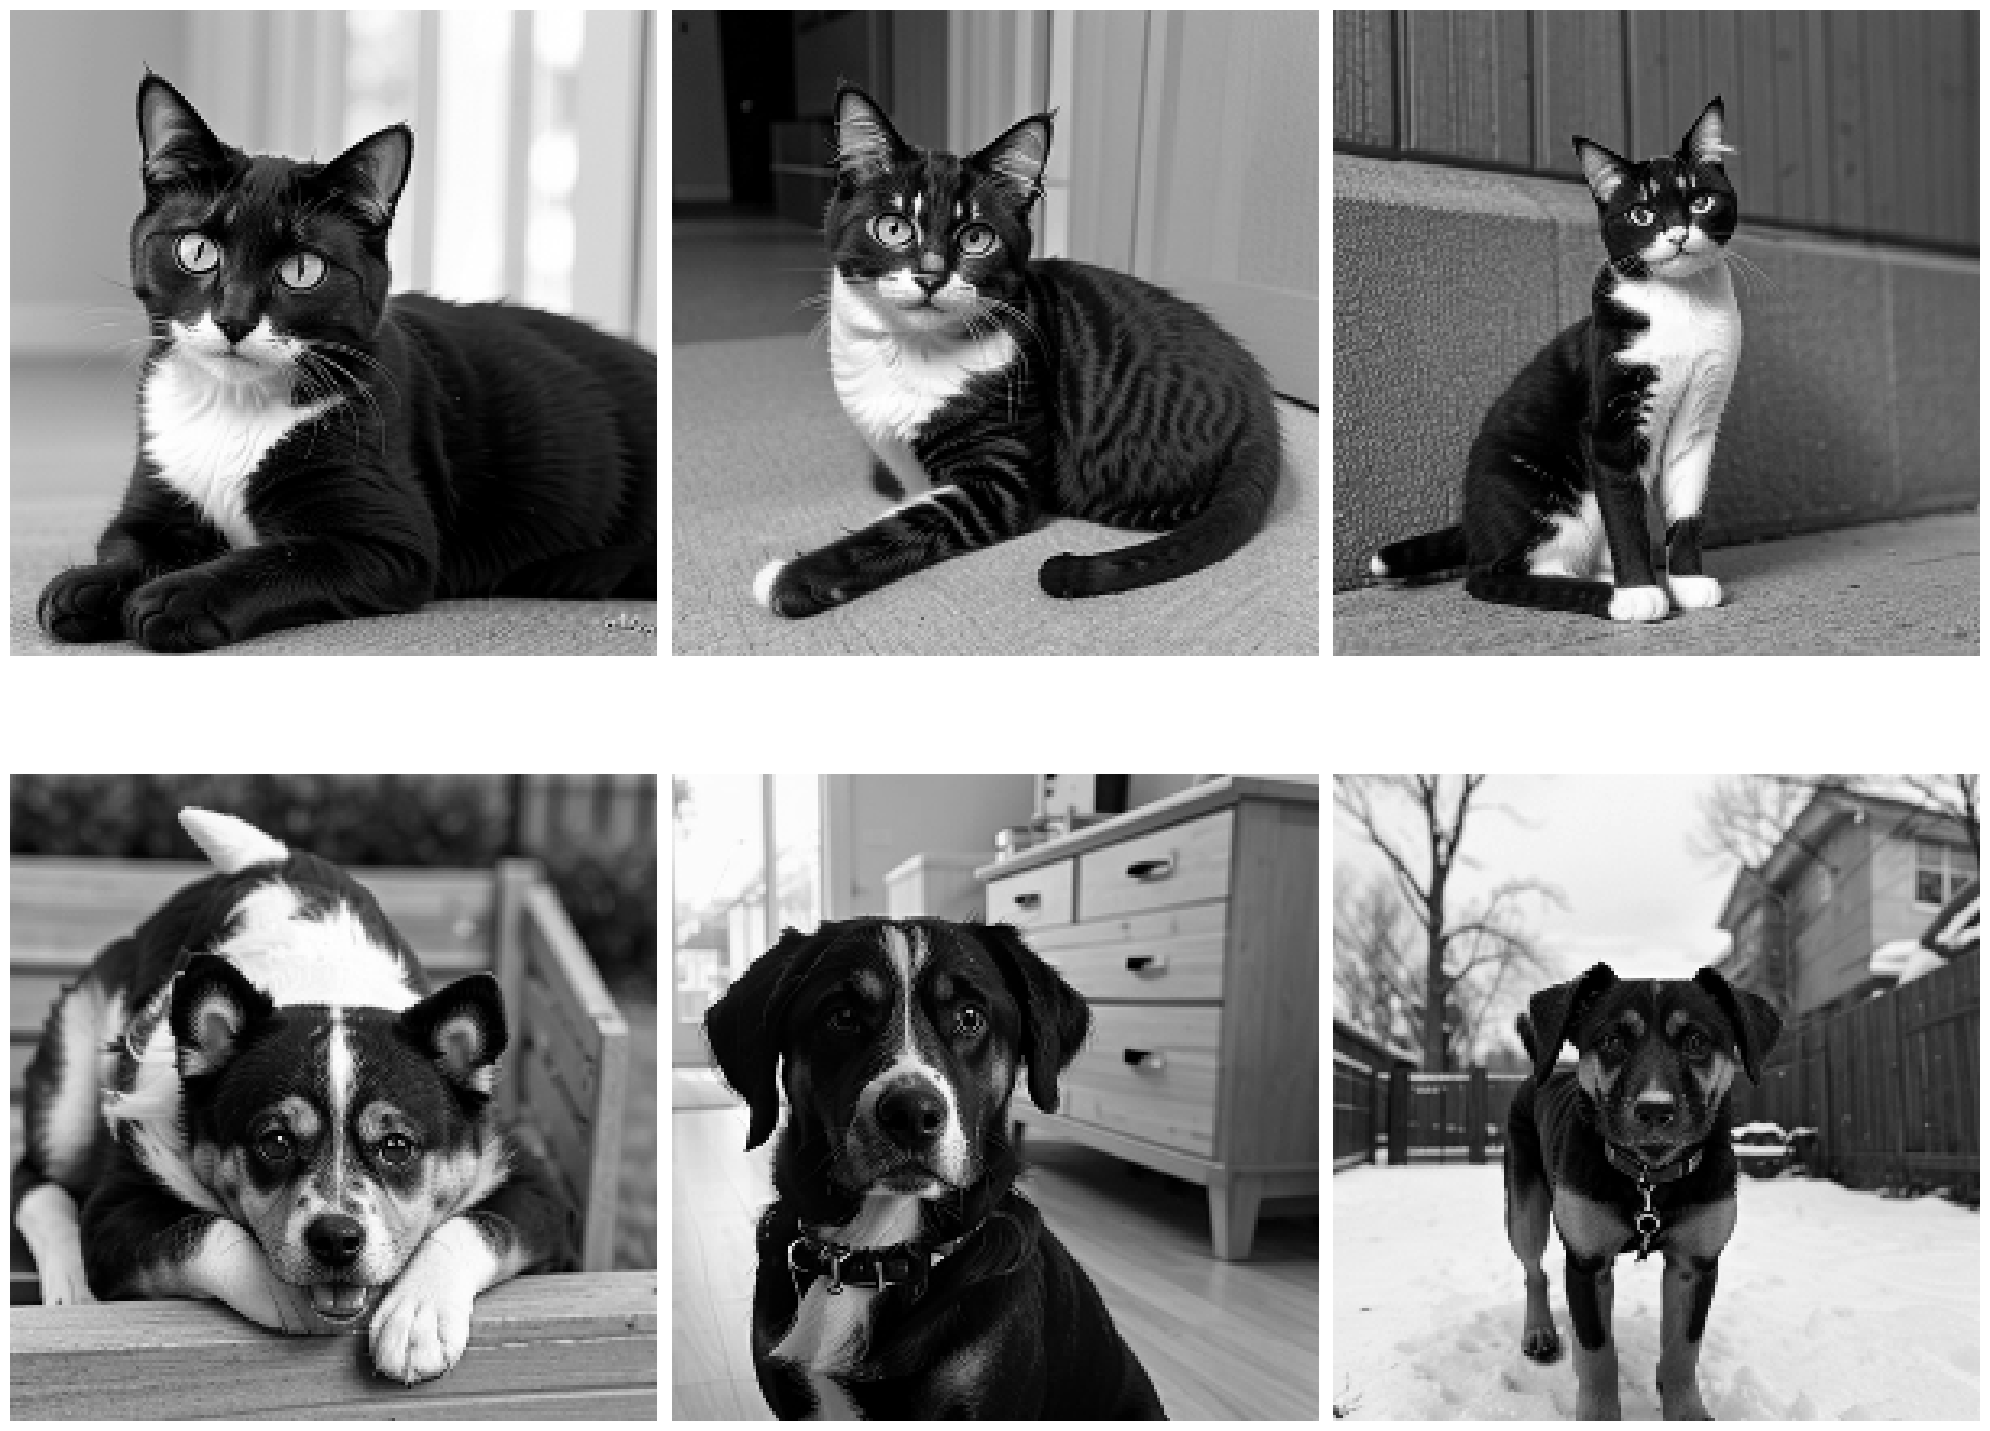

ImagePacker

In [5]:
train_packed

In [6]:
test_packed.rotate_images()

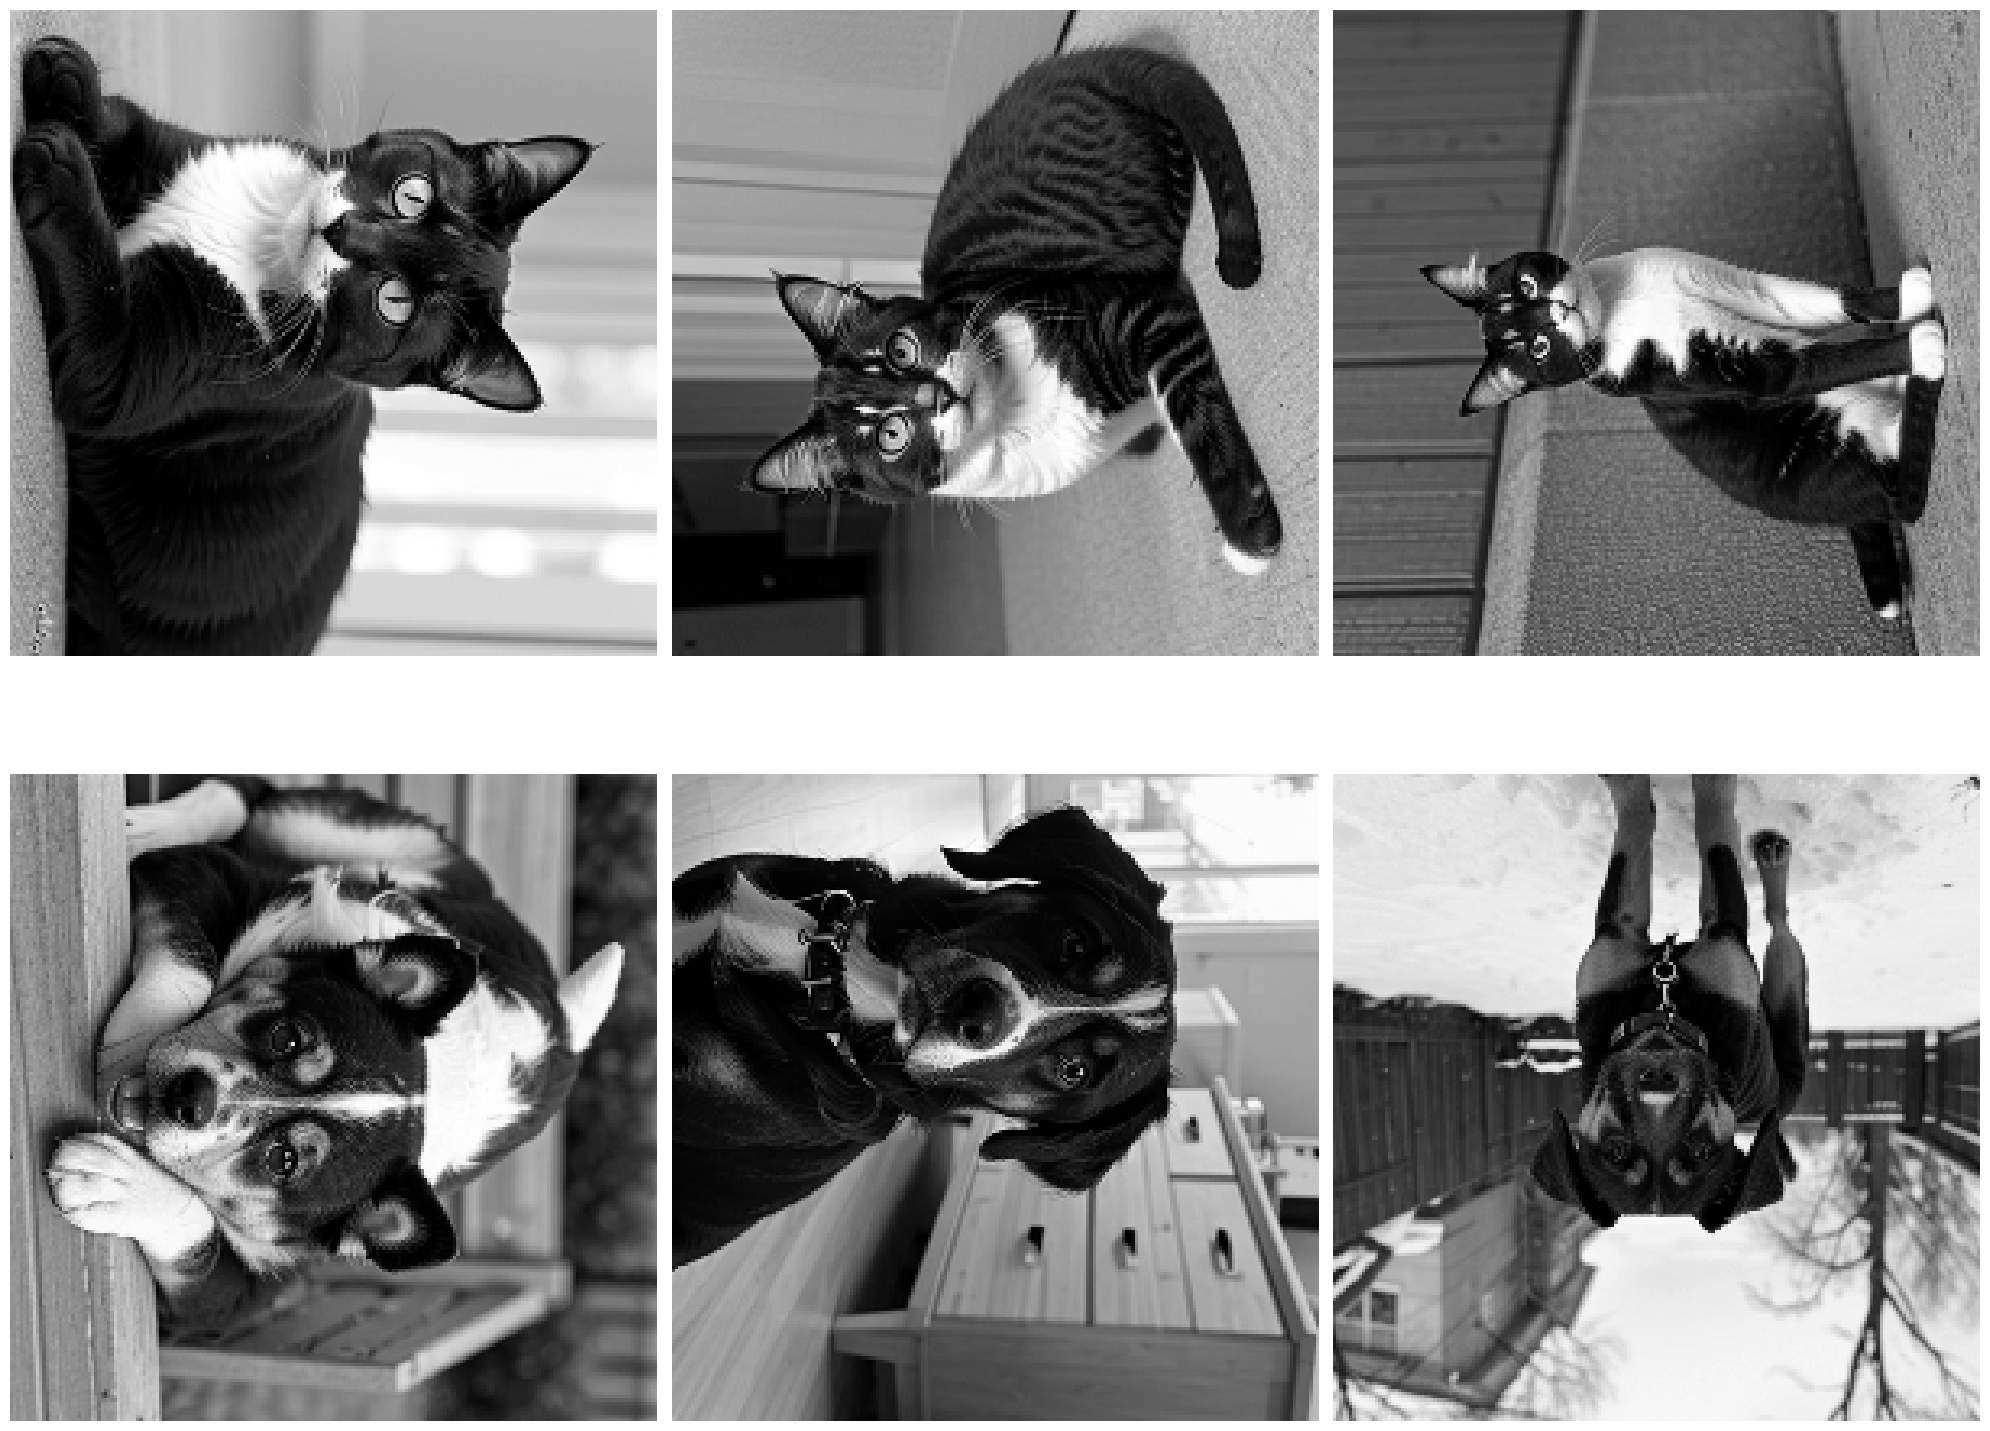

ImagePacker

In [7]:
test_packed

In [8]:
train_sift = train_packed.to_sift(append_label=[1,-1])
test_sift = test_packed.to_sift(append_label=[1,-1])

In [9]:
train_df = train_packed.descriptor_to_df(train_sift)
test_df = test_packed.descriptor_to_df(test_sift)

In [10]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,target
136,0.000000,0.000000,0.037012,0.058521,0.997600,0.000000,0.000000,0.000000,0.000000,0.050870,...,0.180587,0.980558,0.065317,0.010709,0.005756,0.000000,0.015823,0.010296,0.013478,-1
5,0.307472,0.472116,0.678711,0.000000,0.000000,0.000000,0.000000,0.000000,0.471083,0.125817,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.766268,0.707581,1
27,0.000000,0.000000,0.000000,0.147654,0.980291,0.131258,0.000000,0.000000,0.000000,0.023347,...,0.262892,0.249401,0.431314,0.254732,0.274201,0.083134,0.087631,0.000000,0.001262,1
121,0.779996,0.618272,0.000000,0.053469,0.000000,0.000000,0.000000,0.080537,0.000000,0.852494,...,0.369605,0.165304,0.022236,0.246329,0.180789,0.671763,0.205093,0.278482,0.278949,-1
23,0.237885,0.730164,0.428853,0.000000,0.475770,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.010748,0.999740,0.020106,0.000000,0.000000,0.000000,0.006052,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.270464,0.962730,0.240574,...,0.013586,0.000000,0.000000,0.000000,0.000000,0.000000,0.067793,0.994939,0.080034,1
75,0.995903,0.090426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.739819,...,0.000000,0.000000,0.036219,0.998321,0.045213,0.000000,0.000000,0.000000,0.000000,1
107,0.070132,0.000000,0.000000,0.000000,0.964319,0.255285,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.999814,0.019275,0.000000,0.000000,0.000000,0.001881,-1
199,0.725476,0.324443,0.205196,0.000000,0.507833,0.000000,0.205196,0.162221,0.000000,0.298142,...,0.011904,0.049309,0.324567,0.934937,0.113096,0.056838,0.011904,0.000000,0.015371,-1


In [11]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,target
197,0.573651,0.000000,0.709616,0.058667,0.301734,0.000000,0.269972,0.000000,0.000000,0.557878,...,0.319003,0.134172,0.230260,0.260742,0.119671,0.512147,0.693343,0.000000,0.480810,-1
167,0.000000,0.000000,0.000000,0.046273,0.000000,0.707955,0.692712,0.097612,0.085322,0.000000,...,0.000000,0.000000,0.010488,0.999931,0.000000,0.004690,0.001854,0.000000,0.001274,-1
71,0.736460,0.205847,0.000000,0.000000,0.368230,0.411693,0.260378,0.205847,0.000000,0.842152,...,0.492064,0.280964,0.159210,0.297833,0.414427,0.119248,0.100597,0.284650,0.492859,1
152,0.000000,0.000000,0.000000,0.000000,0.000000,0.956056,0.293183,0.000000,0.000000,0.348523,...,0.000000,0.000000,0.000000,0.999449,0.020662,0.014433,0.019352,0.004729,0.000000,-1
165,0.000000,0.293416,0.000000,0.657358,0.000000,0.643356,0.000000,0.260539,0.000000,0.190408,...,0.032350,0.018540,0.114742,0.053576,0.990210,0.000000,0.007666,0.000000,0.042988,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.725950,0.230533,0.291604,0.000000,0.567037,0.000000,0.000000,0.115267,0.000000,0.144966,...,0.195719,0.110558,0.205840,0.044672,0.276860,0.549963,0.556847,0.149041,0.163027,-1
199,0.000000,0.000000,0.000000,0.000000,0.698435,0.715673,0.000000,0.000000,0.000000,0.340503,...,0.220570,0.000000,0.571679,0.349659,0.000000,0.708711,0.000000,0.000000,0.755153,-1
35,0.132527,0.114846,0.059613,0.000000,0.000000,0.725650,0.474848,0.285542,0.363471,0.475686,...,0.000000,0.000000,0.050298,0.258977,0.113946,0.254792,0.646694,0.221520,0.725509,1
55,0.828715,0.165398,0.266696,0.165398,0.073968,0.000000,0.133348,0.330796,0.233908,0.000000,...,0.139092,0.472032,0.203180,0.685243,0.370506,0.317336,0.079481,0.027026,0.010907,1


In [ ]:
train_X, train_y = train_df.iloc[:,:-1], train_df.iloc[:,-1]
test_X, test_y = test_df.iloc[:,:-1], test_df.iloc[:,-1]

In [13]:
model = SVC()
model.fit(train_X, train_y)


SVC()

In [14]:
predictions = model.predict(test_X)


In [15]:
accuracy_score(test_y, predictions)

0.53

In [16]:
len(predictions[predictions == -1])

178